In [105]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [106]:
data = pd.read_csv("https://raw.githubusercontent.com/abdullabasim/dataset/main/UniversalBank.csv")


In [107]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [109]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [110]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [111]:
#data[data['Experience'] < 0]

data['Experience'] = np.where(data['Experience'] < 0, np.nan, data['Experience'])

data.isnull().sum()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [112]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [113]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.320720,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.268054,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [114]:
data['CreditCard'].value_counts()

0.0    3530
1.0    1470
Name: CreditCard, dtype: int64

In [66]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data1 = sc.fit_transform(data)
# data1 = pd.DataFrame(data1, columns = data.columns)

data['Income'] = np.log10(data['Income'])
data['CCAvg'] = np.log10(data['CCAvg'])

data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25.0,1.0,1.690196,91107.0,4.0,0.204120,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,1.531479,90089.0,3.0,0.176091,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,1.041393,94720.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,2.000000,94112.0,1.0,0.431364,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,1.653213,91330.0,4.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,29.0,3.0,1.602060,92697.0,1.0,0.278754,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,4997.0,30.0,4.0,1.176091,92037.0,4.0,-0.397940,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4997,4998.0,63.0,39.0,1.380211,93023.0,2.0,-0.522879,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,4999.0,65.0,40.0,1.690196,90034.0,3.0,-0.301030,2.0,0.0,0.0,0.0,0.0,1.0,0.0


Text(0, 0.5, 'CCAvg')

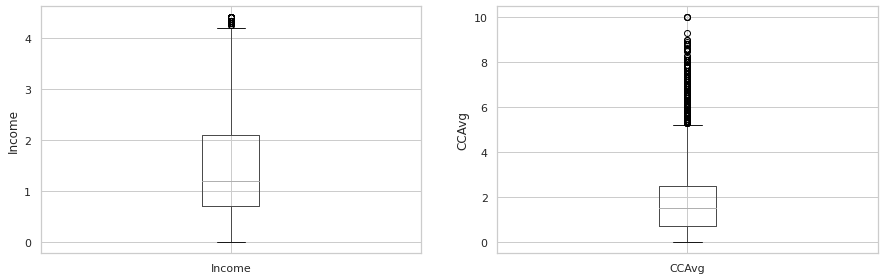

In [130]:
plt.figure(figsize=(15,10))



plt.subplot(2, 2, 1)
fig = data.boxplot(column='Income')
fig.set_title('')
fig.set_ylabel('Income')

plt.subplot(2, 2, 2)
fig = data.boxplot(column='CCAvg')
fig.set_title('')
fig.set_ylabel('CCAvg')



<Axes: xlabel='Income', ylabel='Count'>

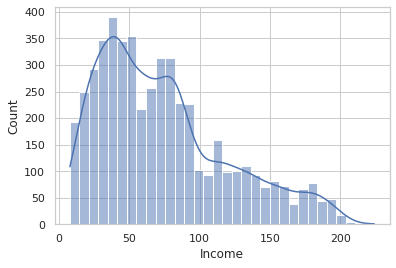

In [116]:
sns.histplot(data=data,x='Income',kde=True) 

<Axes: xlabel='CCAvg', ylabel='Count'>

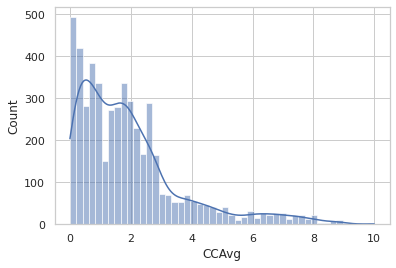

In [117]:
sns.histplot(data=data,x='CCAvg',kde=True) 

In [118]:
def outlier(df,feature):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR

    return df.index[(df[feature] < lower_band) | (df[feature] > upper_band)]

In [129]:
Income_list = outlier(data , 'Income')
#len(Income_list)
data.Income = np.where(  (data.index.isin(Income_list)), data.Income.median().astype(int), data.Income )

In [128]:

CCAvg_list = outlier(data , 'CCAvg')
print(len(CCAvg_list))
data.Income = np.where(  (data.index.isin(CCAvg_list)), data.CCAvg.median().astype(int), data.CCAvg )

In [82]:
X = data.drop(['CreditCard','ID'], axis=1)
y = data['CreditCard']

In [84]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC( random_state = 0)

parameters = [
	{"kernel":
		["linear"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["poly"],
		"degree": [2, 3, 4],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["rbf"],
		"gamma": ["auto", "scale"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X,y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [131]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.26 %
Standard Deviation: 1.56 %
